# Traffic Stops by Race and Gender

**I am analyzing a dataset of traffic stops in all over the United States. The dataset is available at https://openpolicing.stanford.edu/data/.**
In this dataset, I am analyzing traffic stops in Texas only. The dataset has around 2 million rows and is 5GB  in size. 

So lets import necessary modules first

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.figure_factory as ff


I read the data with only the columns I need.

In [2]:
Data= pd.read_csv("/Users/ashikshafi/Downloads/TX_cleaned.csv", sep=',', usecols= ["county_fips", "driver_gender", "driver_age", "driver_race", "violation", "stop_outcome"]
)

Creating labels

In [3]:
labels4= "White", "Hispanic", "Black", "Asian", "Other"


labelsg= "Male", "Female"

Plotting total stops, total citations and total warnings by race.

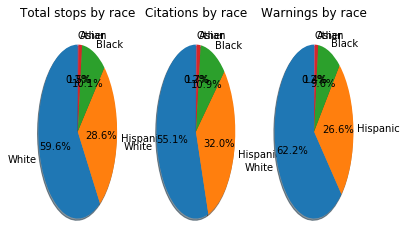

In [4]:
fig=plt.figure()
plt.title("Breakdown of police stops, citations and warnings by race")
plt.subplot(1,3, 1)

plt.pie(Data.driver_race.value_counts(), labels= labels4, autopct="%1.1f%%"  ,shadow=True, startangle=90)
plt.gca().set_title('Total stops by race')
plt.subplot(1,3, 2)

plt.pie(Data[Data["stop_outcome"]=="Citation"].driver_race.value_counts(), labels= labels4, autopct="%1.1f%%"  ,shadow=True, startangle=90)
plt.gca().set_title('Citations by race')

plt.subplot(1,3, 3)

plt.pie(Data[Data["stop_outcome"]=="Warning"].driver_race.value_counts(), labels= labels4, autopct="%1.1f%%"  ,shadow=True, startangle=90)
plt.gca().set_title('Warnings by race')

plt.show()

Plotting total stops, total citations and total warnings by gender.

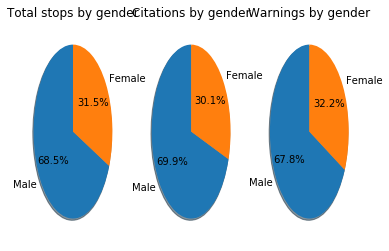

In [5]:

fig=plt.figure()
plt.title("Breakdown of police stops, citations and warnings by gender")
plt.subplot(1,3, 1)

plt.pie(Data.driver_gender.value_counts(), labels= labelsg, autopct="%1.1f%%"  ,shadow=True, startangle=90)
plt.gca().set_title('Total stops by gender')

plt.subplot (1,3, 2)
plt.pie(Data[Data["stop_outcome"]=="Citation"].driver_gender.value_counts(), labels= labelsg, autopct="%1.1f%%"  ,shadow=True, startangle=90)
plt.gca().set_title('Citations by gender')

plt.subplot(1,3, 3)
plt.pie(Data[Data["stop_outcome"]=="Warning"].driver_gender.value_counts(), labels= labelsg, autopct="%1.1f%%"  ,shadow=True, startangle=90)
plt.gca().set_title('Warnings by gender')
plt.show()

Now I am trying to plot which areas in Texas had the highest number of Black drivers stopped and given citations. 

In [6]:
p=Data.loc[Data["stop_outcome"]=="Citation"]
q= Data.loc[Data["driver_race"]=="Black"]
Blackcitation= pd.concat([p,q], join="inner", axis=1)
ValueData=Blackcitation.iloc[:,0].value_counts().rename_axis("CountyFips").reset_index(name="ValueData")



In [13]:

fips= ValueData.CountyFips

values = range(len(fips))

fig = ff.create_choropleth(fips=fips, values=ValueData.ValueData, scope=["TX"], title="Citaiton to Black drivers in different counties of Texas")
py.plot(fig, filename='Citation to Black drivers')



ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

```
pip install geopandas==0.3.0
pip install pyshp==1.2.10
pip install shapely==1.6.3
```
If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/

If you are using Anaconda, do not use PIP to install the packages above. Instead use conda to install them:

```
conda install plotly
conda install geopandas
```

So here Jupyter is giving some errors although plotly is nicely installed in my Pycharm. I used Pychamr and plotly showed me the following graph.